<h1> Assignment 3: Group Project </h1>

<h2> Choosing project topic

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

<b> Description of each attribute</b>

1. Date: The date of observation
2. Location: The location of the weather station
3. MinTemp: The minimum temperature in degrees celsius
4. MaxTemp: The minimum temperature in degrees celsius
5. Rainfall: The amount of rainfall recorded for the day in mm
6. Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine: The number of hours of bright sunshine in the day.
8. WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10. WindDir9am: Direction of the wind at 9am
11. WindDir3pm: Direction of the wind at 3pm
12. WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
13. WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14. Humidity9am: Humidity (percent) at 9am 
15. Humidity3pm: Humidity (percent) at 3pm
16. Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am    
17. Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm  
18. Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast. 
19. Cloud3pm: Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast. 
20. Temp9am: Temperature (degrees C) at 9am      
21. Temp3pm: Temperature (degrees C) at 3pm      
22. RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0 
23. RainTomorrow: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

<h2> Task 1.1: Data Retrieving and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import time
import catboost as cb
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
# read data
data = pd.read_csv('weatherAUS.csv', encoding='utf-8', error_bad_lines = False)

#### Explore data

In [3]:
# display all columns
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data.shape

(145460, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<h4>Extra whitespaces

In [7]:
#Extra whitespaces
def whitespaces_remover(x):
    for i in x: #create a loop to run through whole data file
        if x[i].dtype == "object": #check if this value is a string or not
            x[i] = x[i].str.strip() #return the same string without whitespaces            
whitespaces_remover(data)

<h4>Add prefixes

In [8]:
# add prefixes to easy observe Wind Direction at 9am and 3pm
def add_column_prefixes(data, column, prefix):
    return data[column].apply(lambda x: prefix + str(x))
data['WindDir9am'] = add_column_prefixes(data, 'WindDir9am', "9_")
data['WindDir3pm'] = add_column_prefixes(data, 'WindDir3pm', "3_")

<h4>Handle missing value

In [9]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<AxesSubplot:>

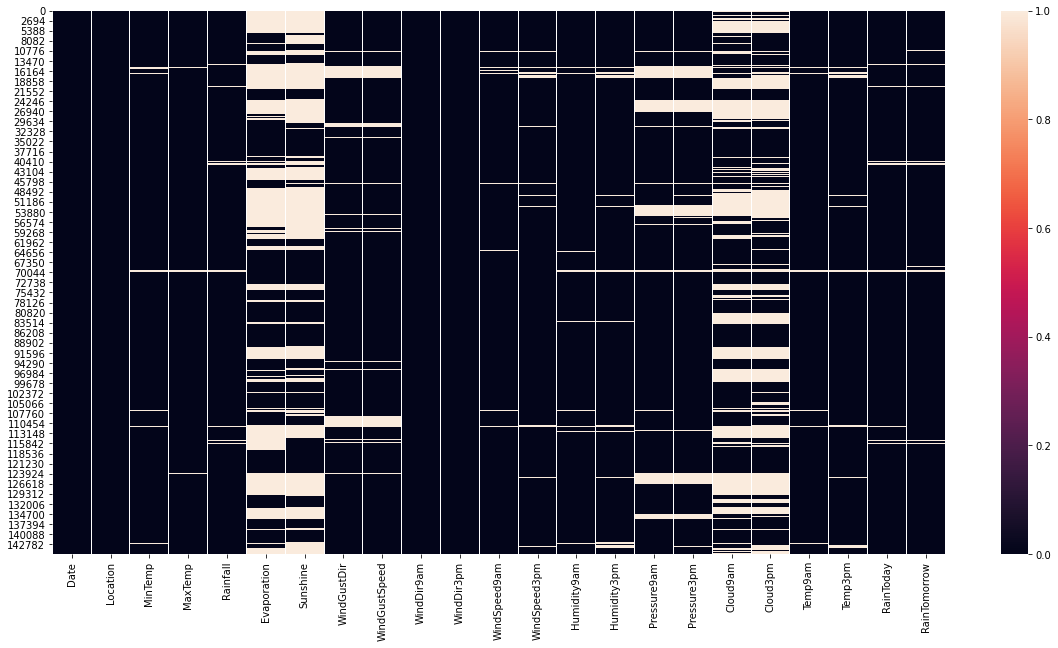

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(data.isnull(), cmap=None)

#### It can be observed that 'Evaporation','Sunshine','Cloud9am','Cloud3pm' are the features having high missing percentage. So we will drop these 4 features.


In [11]:
data.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1, inplace=True)

In [12]:
# "Date" is also excluded for the obvious reason since it is not adding any relevance in the current context
data.drop('Date', axis=1, inplace=True)

In [13]:
#Fill missing values of two column "RainToday" and "RainTomorrow" with "No"
data['RainToday'] = data['RainToday'].fillna('No')
data['RainTomorrow'] = data['RainTomorrow'].fillna('No')

In [14]:
#fill null value of object columns with Unknown
def fillna_object(x):
    for i in x: # Loop through the dataframe
        if x[i].dtype == "object": # Get object type values
            x[i] = x[i].fillna('Unknown')
fillna_object(data)

In [15]:
#fill null value of float columns with median
def fillna_float(x):
    for i in x: # Loop through the dataframe
        if x[i].dtype == "float64": # Get object type values
            x[i] = x[i].fillna(math.floor(data[i].median()))
fillna_float(data)

In [16]:
data.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [17]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [18]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,9_W,3_WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,9_NNW,3_WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,9_W,3_WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,9_SE,3_E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,9_ENE,3_NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


### Save dataframe to CSV

In [19]:
# Export CSV
data.to_csv('data_cleaned.csv', index=False, header=True)

<h2> Task 1.2: Data Exploration

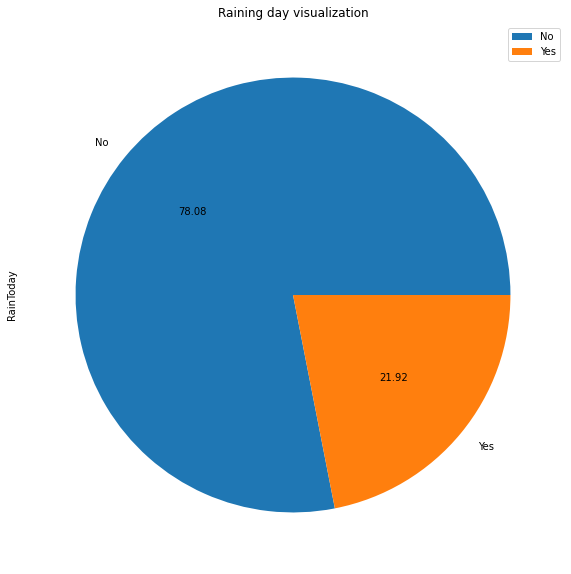

In [20]:
# Contact visualization
data['RainToday'].value_counts().plot(kind="pie", autopct ='%.2f', figsize = (15, 10))
#Define the title and set legend
plt.title("Raining day visualization")
plt.legend(loc = "best", bbox_to_anchor = (1, 1))

I use pie chart to illustrate "RainToday" for a variety of reasons. As there are only two forms of interaction with the rainy data, it is simple to construct a pie chart and the user can easily see the amount of days that is rainy in the last 10 years. As can be seen, in the last 10 years, only approximately 20% of the day that is rainy. That proves that Australia is a low rainfall country.

Text(0, 0.5, 'Frequency')

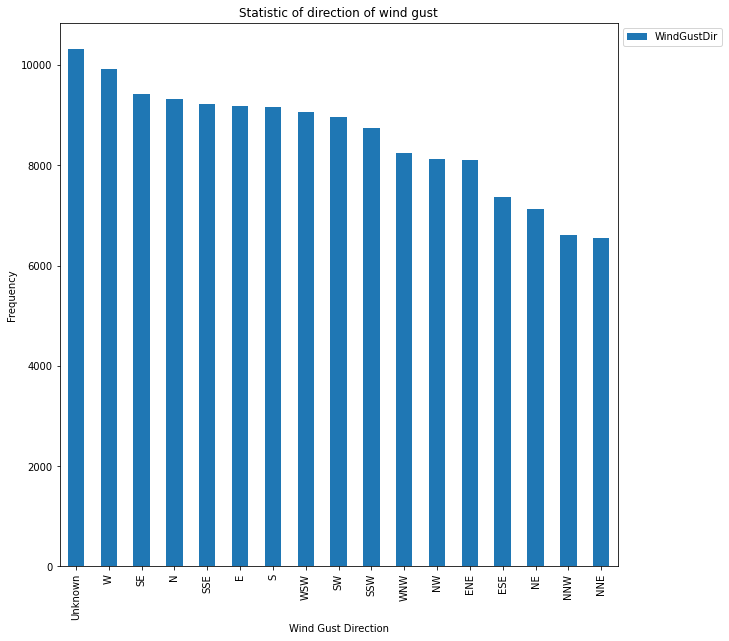

In [21]:
#Wind Gust visualization
data["WindGustDir"].value_counts()
figure = plt.figure(figsize=(10, 10)) 
#Define the axis
ax = figure.gca() 
#Draw the graph
data["WindGustDir"].value_counts().plot.bar(ax = ax)
#Define the plot title, x label, y label
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1) )
ax.set_title('Statistic of direction of wind gust')
ax.set_xlabel('Wind Gust Direction') 
ax.set_ylabel('Frequency')

In general, almost all wind directions have occurred between 8,000 and 10,000 in the past 10 years. The most appearing wind direction is the West with nearly 10,000 times. In contrast, north-northwest and north-northeast only have approximately 7,000 recorded cases


Text(0, 0.5, 'Frequency')

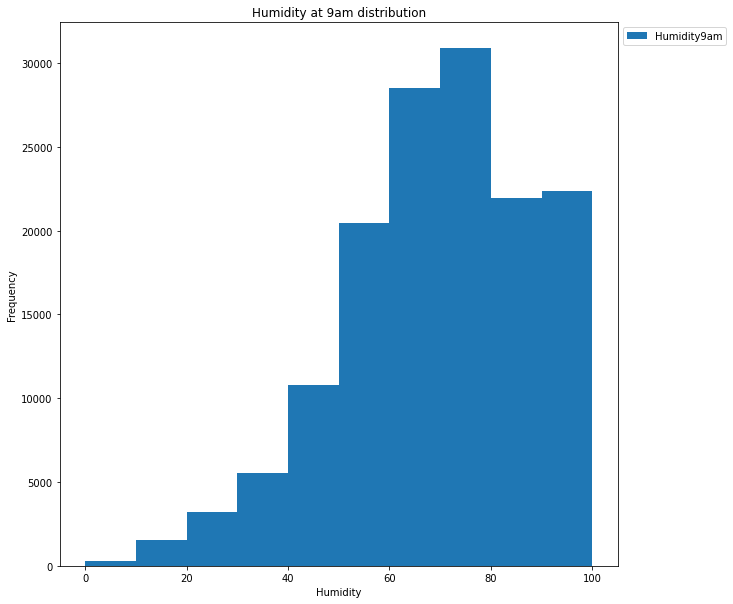

In [22]:
figure = plt.figure(figsize=(10,10)) 
#Define the axis
ax = figure.gca()
#Draw the plot using histogram plot
data['Humidity9am'].plot.hist(ax = ax)
#Define the title, x label, y label
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1) )
ax.set_title('Humidity at 9am distribution')
ax.set_xlabel('Humidity') 
ax.set_ylabel('Frequency')

It can be shown, in general, that the Australian humidity has an erratic range at 9 am. It can be said that the average humidity here is from 70 to 80 percent, with the largest amount being the sum recorded about 30000 times. Besides that, the second prevalence of 60 percent and between 80 percent and 100 percent humidity is often seen from a calculation of over 20,000 days. With humidity levels in Australia between 0 and 30% less normal when measured at the lowest frequency below 5000 times


Text(0, 0.5, 'MaxTemp')

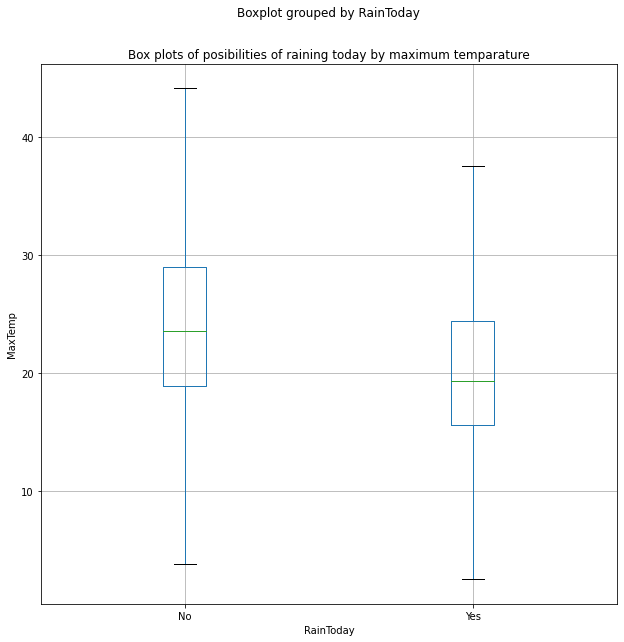

In [23]:
#set the plot area
figure = plt.figure(figsize=(10,10)) 
# Define axis 
ax = figure.gca()    
data[['MaxTemp','RainToday']].boxplot(by = 'RainToday', ax = ax, showfliers=False) 
#Define title, x lable and y lable
# plt.legend(loc = "upper left", bbox_to_anchor = (1, 1) )
ax.set_title('Box plots of posibilities of raining today by maximum temparature') 
ax.set_xlabel('RainToday')
ax.set_ylabel('MaxTemp')

According to the graph, it can be seen clearly that on days without rain, the maximum temperature for that day is usually higher than on rainy days. The average temperature on a rainy day is also greater than that of a rainy day. The average temperature of a rainy day is also greater than that of a rainy day, with 24 degrees compared to 19 degrees on a rainy day


Text(0, 0.5, 'Temp9am')

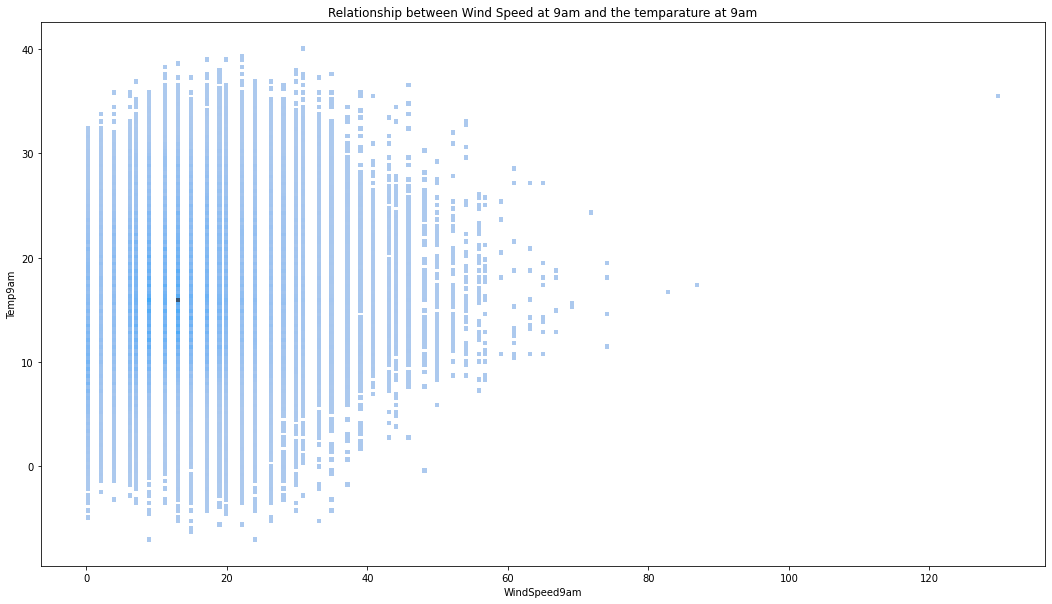

In [24]:
#set the plot area
figure = plt.figure(figsize=(18,10)) 
# define axis 
ax = figure.gca()    
sns.histplot(data=data, x=data['WindSpeed9am'], y=data['Temp9am'])
#set title, x lable and y lable
# plt.legend(loc = "upper left", bbox_to_anchor = (1, 1) )
ax.set_title('Relationship between Wind Speed at 9am and the temparature at 9am') 
ax.set_xlabel('WindSpeed9am')
ax.set_ylabel('Temp9am')

Initial hypothesis: Days with lower temperature tends to be more windy.

Result: According to the data, wind speed and temperature do not have correlative relationship when the data

Text(0, 0.5, 'WindGustSpeed')

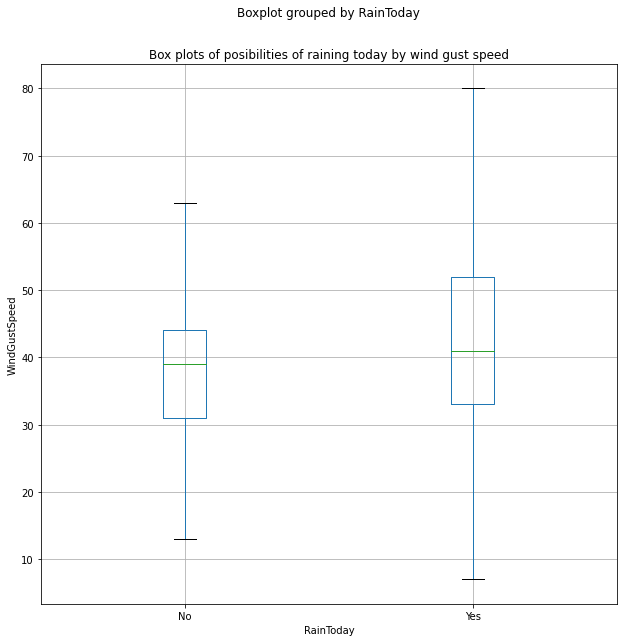

In [25]:
#set the plot area
figure = plt.figure(figsize=(10,10)) 
# Define axis 
ax = figure.gca()    
data[['WindGustSpeed','RainToday']].boxplot(by = 'RainToday', ax = ax, showfliers=False) 
#Define title, x lable and y lable
# plt.legend(loc = "upper left", bbox_to_anchor = (1, 1) )
ax.set_title('Box plots of posibilities of raining today by wind gust speed') 
ax.set_xlabel('RainToday')
ax.set_ylabel('WindGustSpeed')

As can be seen in the graph, although the average winds on a rainy and no rainy day are almost the same, falling around 40km/h, the wind on a rainy day fluctuates less than a day with rain. While the wind on a sunny day is from 31km/h to 45km/h, the figure for rainy day is from 32km/h to 53km/h.


In [26]:
# Split data into train and test set
data_train, data_test= train_test_split(data, test_size=0.2, random_state=0, shuffle=True)

In [27]:
# Save test set in json format for testing API (evaluate)
data_test.to_json('test_evaluate.json', orient='index')

In [28]:
data_test.to_json('test_predict.json', orient='index')

<h2> Task 2: Data Modelling 

<h4>Feature Engineering

In [29]:
#Since two object columns 'RainToday', 'RainTomorrow' data are Yes and No, we will Binary Encode them into 0 and 1

data_train['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data_train['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
    

c:\users\viet anh tran\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [30]:
# We will now lable encode the rest object columns to build model
encoder = LabelEncoder()

label_encoder_columns = data_train.columns[data_train.dtypes == object]

for column in label_encoder_columns:
    data_train[column] = encoder.fit_transform(data_train[column])


<ipython-input-30-efb76c06a5fb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[column] = encoder.fit_transform(data_train[column])


<AxesSubplot:>

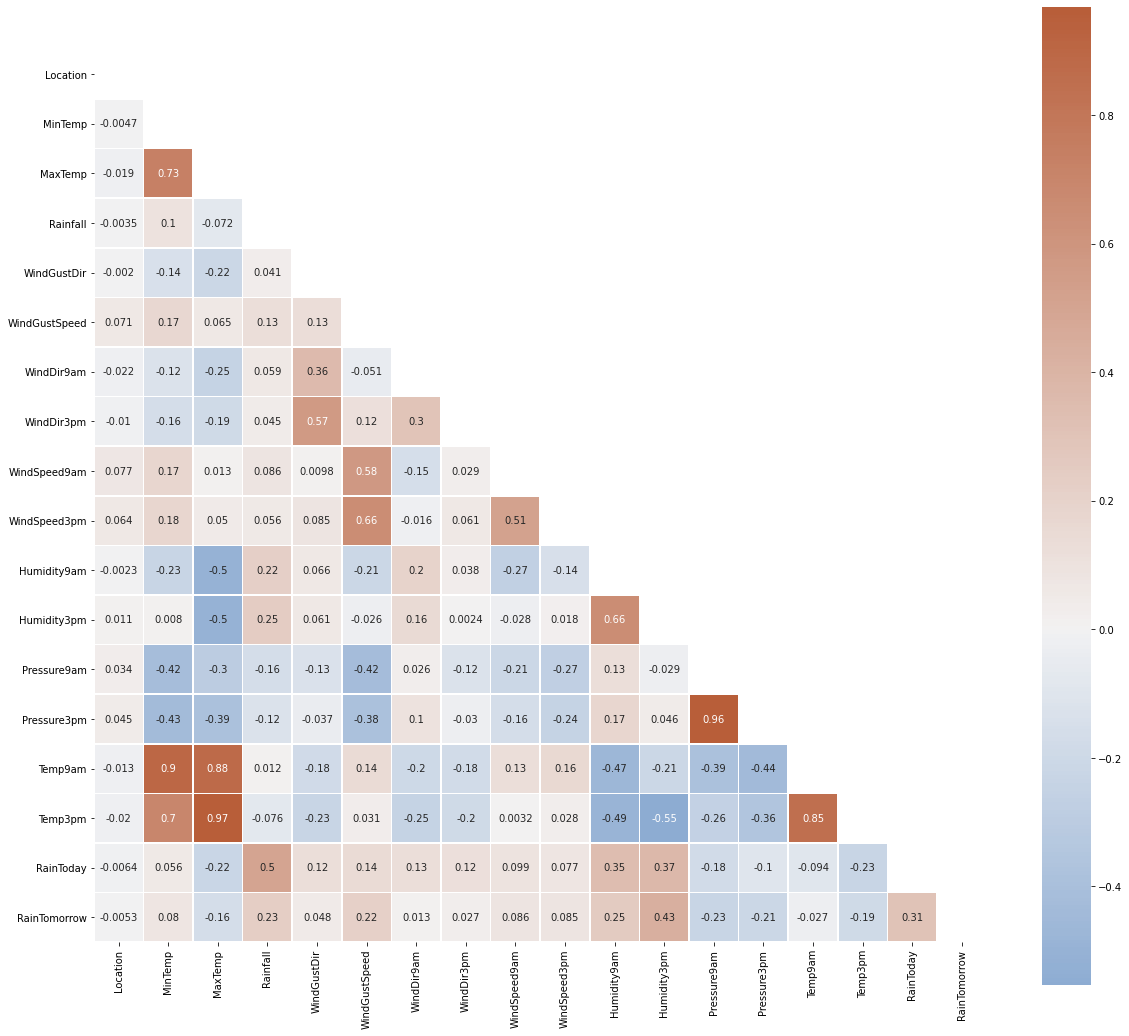

In [31]:
# We will now check for multi-collinearity
corr = data_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

#### => We are not discarding any feature

# Training Data

In [32]:
X = data_train.drop('RainTomorrow', axis=1) 
y = data_train['RainTomorrow'] #target value

In [33]:
#We will split the entire data set into training (80%) and testing (20%) sets respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
X_train.shape


(93094, 17)

In [35]:
#For getting better results, we will standardize our X_train and X_test data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [36]:
#ROC plot
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [37]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

#### Model-1: Logistic Regression

Accuracy = 0.8405516885795308
ROC Area under Curve = 0.702915034999371
Cohen's Kappa = 0.466025293058278
Time taken = 2.091667652130127
              precision    recall  f1-score   support

           0    0.86124   0.94846   0.90275     18160
           1    0.71420   0.45737   0.55763      5114

    accuracy                        0.84055     23274
   macro avg    0.78772   0.70292   0.73019     23274
weighted avg    0.82893   0.84055   0.82692     23274



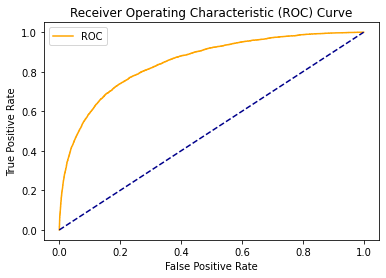

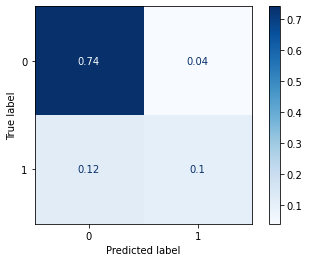

In [38]:
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

#### Model-2: Neural Network

c:\users\viet anh tran\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy = 0.8494027670361777
ROC Area under Curve = 0.7286748478306937
Cohen's Kappa = 0.5101276321460074
Time taken = 325.3848674297333
              precision    recall  f1-score   support

           0    0.87322   0.94405   0.90726     18160
           1    0.72096   0.51330   0.59966      5114

    accuracy                        0.84940     23274
   macro avg    0.79709   0.72867   0.75346     23274
weighted avg    0.83977   0.84940   0.83967     23274



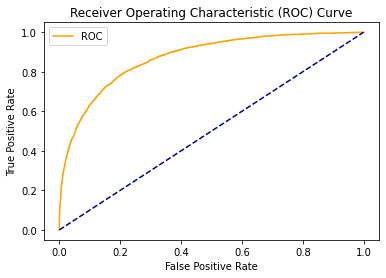

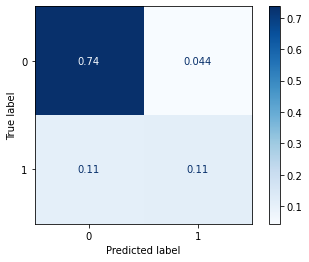

In [39]:
params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)


#### Model-3: Random Forest

Accuracy = 0.8495746326372776
ROC Area under Curve = 0.7157909896647192
Cohen's Kappa = 0.4959168735929542
Time taken = 46.14704513549805
              precision    recall  f1-score   support

           0    0.86635   0.95446   0.90827     18160
           1    0.74686   0.47712   0.58227      5114

    accuracy                        0.84957     23274
   macro avg    0.80660   0.71579   0.74527     23274
weighted avg    0.84009   0.84957   0.83664     23274



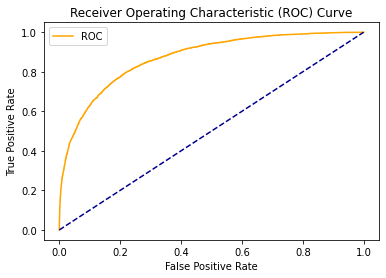

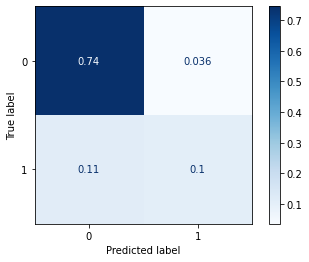

In [40]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)


#### Model-4: CatBoost

Accuracy = 0.8490160694337029
ROC Area under Curve = 0.7322901286784658
Cohen's Kappa = 0.5134061934623985
Time taken = 134.90546989440918
              precision    recall  f1-score   support

           0    0.87527   0.94053   0.90673     18160
           1    0.71277   0.52405   0.60401      5114

    accuracy                        0.84902     23274
   macro avg    0.79402   0.73229   0.75537     23274
weighted avg    0.83956   0.84902   0.84021     23274



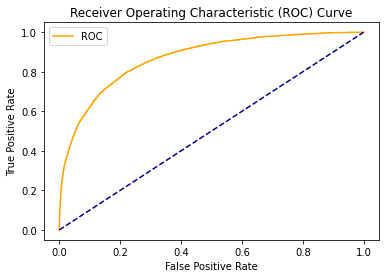

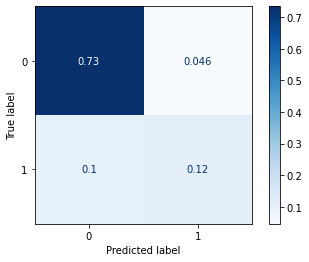

In [41]:
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

#### Model-5: XGBoost

c:\users\viet anh tran\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.8521526166537767
ROC Area under Curve = 0.7399190634157939
Cohen's Kappa = 0.5267107913271791
Time taken = 85.85337829589844
              precision    recall  f1-score   support

           0    0.87883   0.94014   0.90845     18160
           1    0.71744   0.53969   0.61600      5114

    accuracy                        0.85215     23274
   macro avg    0.79814   0.73992   0.76223     23274
weighted avg    0.84337   0.85215   0.84419     23274



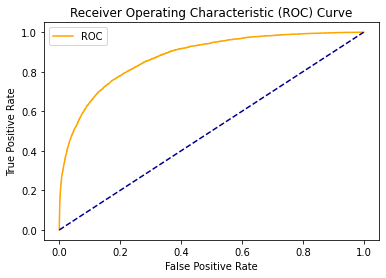

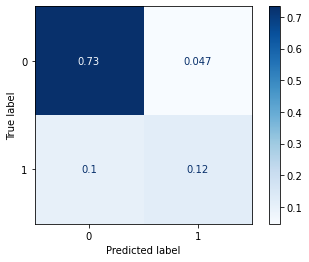

In [42]:
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

# Results

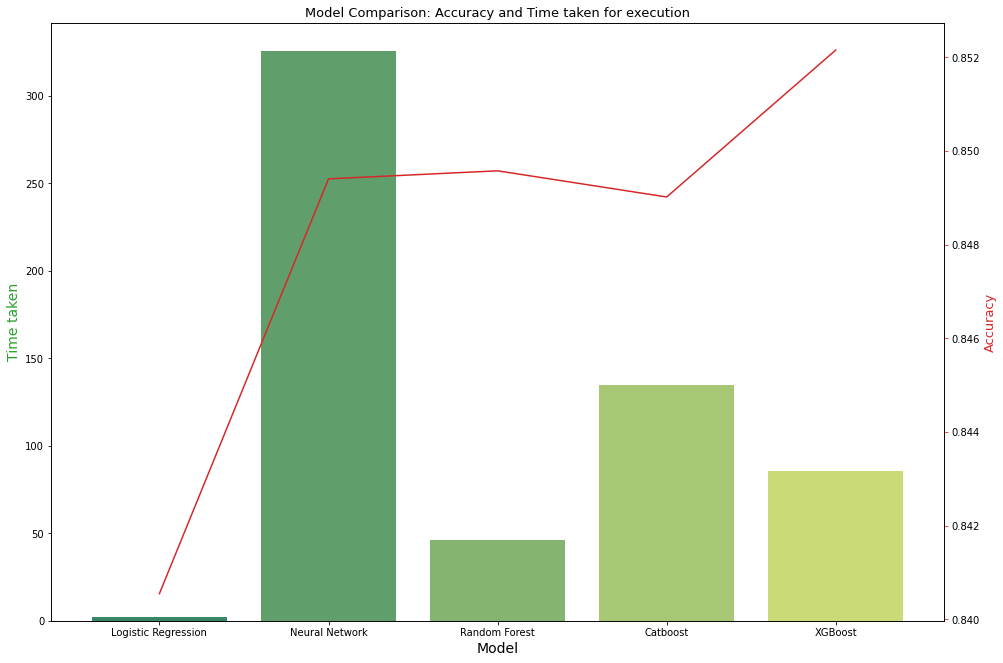

In [43]:
accuracy_scores = [accuracy_lr, accuracy_nn, accuracy_rf, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_nn, roc_auc_rf, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_nn, coh_kap_rf, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_nn, tt_rf, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Neural Network','Random Forest','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(16,11))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color1 = 'tab:green'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color1)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color2)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color2)
ax2.tick_params(axis='y', color=color2)

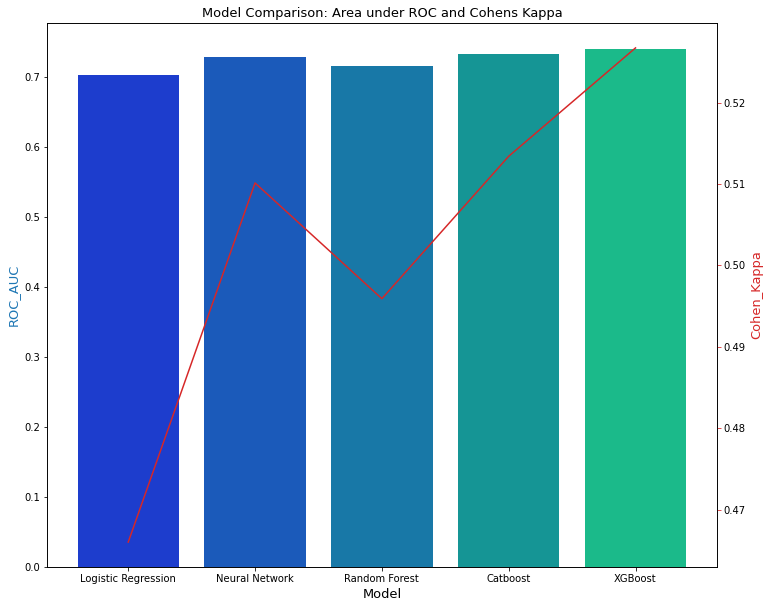

In [44]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

In [45]:
# IMPORTANT: Save model for deployment
import pickle
pkl_filename = "xgb_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_xgb, file)